In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.lines import Line2D
import numpy as np
from pathlib import Path
import polars as pl
import h5py

print(plt.style.available)

plt.style.use("bmh")
# Make all new figures/axes transparent by default
plt.rcParams["figure.facecolor"] = "none"  # or (1, 1, 1, 0)
plt.rcParams["axes.facecolor"] = "none"

plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Latin Modern Roman"],
        "mathtext.fontset": "cm",  # still fine; there is no LMR math in mathtext
        "font.size": 14,          
        "figure.figsize": (7, 4), # 
    }
)
plt.rcParams.update(
    {
        "text.usetex": True,
        # Tell LaTeX to load any package you like
        "text.latex.preamble": r"\usepackage{amssymb}",  # not lmodern
    }
)
# plt.style.use('fivethirtyeight') # For slide

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


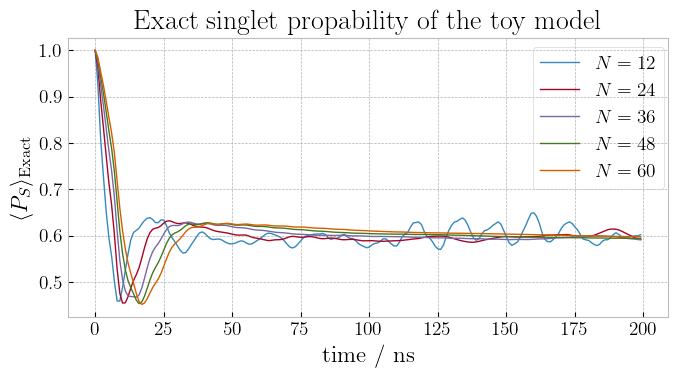

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


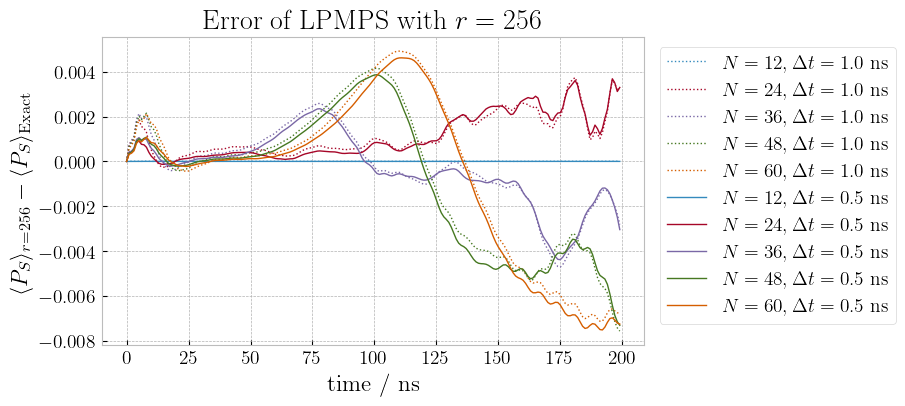

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


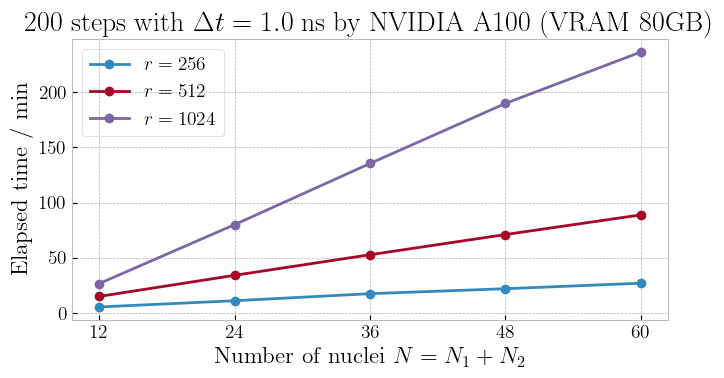

In [3]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
line_styles = [":", "--", "-.", "-"]
N = [12, 24, 36, 48, 60]
T256 = [317, 655, 1040, 1310, 1610]
T512 = [890, 2040, 3160, 4260, 5330]
T1024 = [1590, 4800, 8130, 11400, 14200]
time = np.arange(0.0, 200.0, 1.0)
N12_pmps = np.load("3.17e+02-N1=6-N2=6-m=256-dn=1-S.npy")
N12_pmps_dn2 = np.load("5.50e+02-N1=6-N2=6-m=256-dn=2-S.npy")
N12_symr = np.load("symmetry_reduction_N12.npy")

N24_pmps = np.load("6.55e+02-N1=12-N2=12-m=256-dn=1-S.npy")
N24_pmps_dn2 = np.load("1.10e+03-N1=12-N2=12-m=256-dn=2-S.npy")
N24_symr = np.load("symmetry_reduction_N24.npy")

N36_pmps = np.load("1.04e+03-N1=18-N2=18-m=256-dn=1-S.npy")
N36_pmps_dn2 = np.load("1.69e+03-N1=18-N2=18-m=256-dn=2-S.npy")
N36_symr = np.load("symmetry_reduction_N36.npy")

N48_pmps = np.load("1.31e+03-N1=24-N2=24-m=256-dn=1-S.npy")
N48_pmps_dn2 = np.load("2.25e+03-N1=24-N2=24-m=256-dn=2-S.npy")
N48_symr = np.load("symmetry_reduction_N48.npy")

N60_pmps = np.load("1.61e+03-N1=30-N2=30-m=256-dn=1-S.npy")
N60_pmps_dn2 = np.load("2.91e+03-N1=30-N2=30-m=256-dn=2-S.npy")
N60_symr = np.load("symmetry_reduction_N60.npy")

plt.plot(time, N12_symr, ls="-",  lw=1, color=colors[0], label="$N=12$")
plt.plot(time, N24_symr, ls="-",  lw=1, color=colors[1], label="$N=24$")
plt.plot(time, N36_symr, ls="-",  lw=1, color=colors[2], label="$N=36$")
plt.plot(time, N48_symr, ls="-",  lw=1, color=colors[3], label="$N=48$")
plt.plot(time, N60_symr, ls="-",  lw=1, color=colors[4], label="$N=60$")
plt.xlabel("time / ns")
plt.ylabel(r"$\langle P_S\rangle_{\mathrm{Exact}}$")
plt.legend(fontsize=14, bbox_to_anchor=(1.01, 1))
plt.title("Exact singlet propability of the toy model")
plt.tight_layout()
plt.savefig("N-vs-exactPs.eps", bbox_inches='tight')
plt.show()

#plt.plot(time, N12_symr, ls="-",  lw=1, color=colors[0], label="N=12: Exact")
plt.plot(time, N12_pmps-N12_symr, ls=":", lw=1, color=colors[0], label=r"$N=12, \Delta t=1.0\;\mathrm{ns}$")#, marker="o", markevery=10)


#plt.plot(time, N24_symr, ls="-",  lw=1, color=colors[1], label="N=24: Exact")
plt.plot(time, N24_pmps-N24_symr, ls=":", lw=1, color=colors[1], label=r"$N=24, \Delta t=1.0\;\mathrm{ns}$")#, marker="o", markevery=10)


#plt.plot(time, N36_symr, ls="-",  lw=1, color=colors[2], label="N=36: Exact")
plt.plot(time, N36_pmps-N36_symr, ls=":", lw=1, color=colors[2], label=r"$N=36, \Delta t=1.0\;\mathrm{ns}$")# , marker="o", markevery=10)


#plt.plot(time, N48_symr, ls="-",  lw=1, color=colors[3], label="N=48: Exact")
plt.plot(time, N48_pmps-N48_symr, ls=":", lw=1, color=colors[3], label=r"$N=48, \Delta t=1.0\;\mathrm{ns}$")#, marker="o", markevery=10)


#plt.plot(time, N36_symr, ls="-",  lw=1, color=colors[4], label="N=60: Exact")
plt.plot(time, N60_pmps-N60_symr, ls=":", lw=1, color=colors[4], label=r"$N=60, \Delta t=1.0\;\mathrm{ns}$")#, marker="o", markevery=10)

plt.plot(time, N12_pmps_dn2-N12_symr, ls="-", lw=1, color=colors[0], label=r"$N=12, \Delta t=0.5\;\mathrm{ns}$")#, marker="x", markevery=10)
plt.plot(time, N24_pmps_dn2-N24_symr, ls="-", lw=1, color=colors[1], label=r"$N=24, \Delta t=0.5\;\mathrm{ns}$")#, marker="x", markevery=10)
plt.plot(time, N36_pmps_dn2-N36_symr, ls="-", lw=1, color=colors[2], label=r"$N=36, \Delta t=0.5\;\mathrm{ns}$")#, marker="o", markevery=10)
plt.plot(time, N48_pmps_dn2-N48_symr, ls="-", lw=1, color=colors[3], label=r"$N=48, \Delta t=0.5\;\mathrm{ns}$")#, marker="o", markevery=10)
plt.plot(time, N60_pmps_dn2-N60_symr, ls="-", lw=1, color=colors[4], label=r"$N=60, \Delta t=0.5\;\mathrm{ns}$")#, marker="o", markevery=10)


plt.xlabel("time / ns")
plt.ylabel(r"$\langle P_S\rangle_{r=256} - \langle P_S\rangle_{\mathrm{Exact}}$")
plt.legend(fontsize=14, ncol=1, bbox_to_anchor=(1.01, 1))
plt.title(r"Error of LPMPS with $r=256$")
#plt.tight_layout()
plt.savefig("N-vs-deltaPs.eps", bbox_inches='tight')
plt.show()

plt.plot(N, np.array(T256) / 60, marker="o", label=r"$r=256$")
plt.plot(N, np.array(T512) / 60, marker="o", label=r"$r=512$")
plt.plot(N, np.array(T1024) / 60, marker="o", label=r"$r=1024$")
plt.xlabel("Number of nuclei $N=N_1+N_2$")
plt.ylabel("Elapsed time / min")
plt.title(r"$200$ steps with $ \Delta t = 1.0 \;\mathrm{ns}$ by NVIDIA A100 (VRAM 80GB)")
plt.legend(fontsize=14)
plt.xticks(N)
plt.tight_layout()
plt.savefig("time.eps", bbox_inches='tight')
plt.show()